In [49]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
import folium
from geopy.geocoders import Nominatim


df =pd.read_csv('df-climatechange.csv')
df1 = df[df.qb2 >= 6]
df2 = df[df.qb2 <= 5]
df.head()

,Unnamed: 0,qb1a,qb2,qb5,qb4_3,qb4_5,qb7,qb8,qb9,d1,d10,d11,d25,d8,d63,d7,country,cca,cluster
0,0,Climate change,4,No,2,2,2,2,2,Centre-letf,Man,20,Large town,Still studying,The middle class of society,Single,Belgium,1,1
1,1,The increasing global population,5,No,2,2,2,2,2,Centre-letf,Man,55,Large town,Refusal/dk,The middle class of society,Partner and children,Belgium,1,1
2,2,Climate change,6,No,2,2,2,1,1,Centre-letf,Man,80,Large town,Refusal/dk,The lower middle class of society,Single,Belgium,2,1
3,3,"Poverty, hunger and lack of drinking water",6,Yes,2,2,2,2,2,Centre,Man,40,Large town,Refusal/dk,The lower middle class of society,Partner and children,Belgium,1,1
4,4,Proliferation of nuclear weapons,5,Yes,3,3,2,3,2,Centre,Man,55,Large town,Refusal/dk,The middle class of society,Partner and children,Belgium,2,1


In [6]:
len(df)

21978

#### Count observations of dependent variable: qb5

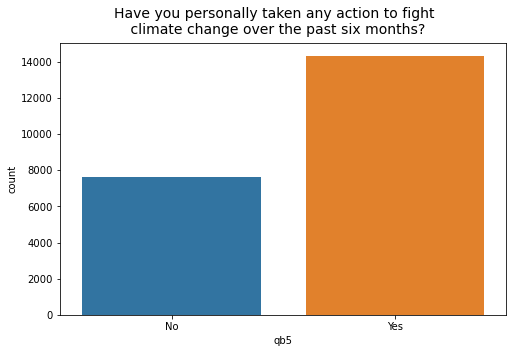

In [2]:
plt.subplots(ncols=1, sharey=True, figsize = (8,5))         

sns.countplot(x=df['qb5'])
plt.suptitle('Have you personally taken any action to fight \n climate change over the past six months?', fontsize = 14)


plt.savefig('qb5-count-cc.png')

In [10]:
df.groupby('qb5')['qb5'].count()

qb5
No      7651
Yes    14327
Name: qb5, dtype: int64

#### Count observations of dependent variable (qb5) according to high risk perception and low risk perception 

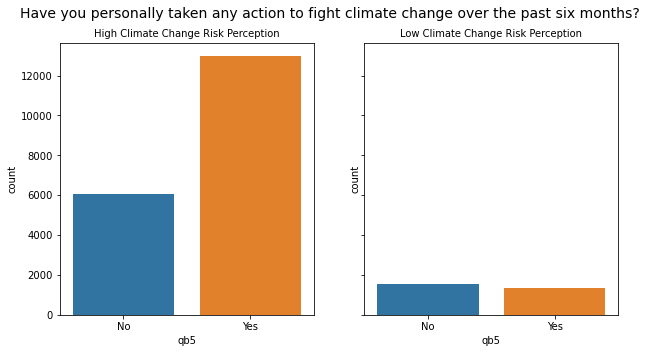

In [5]:

fig, (ax1, ax2) = plt.subplots(ncols=2, sharey=True, figsize = (10,5))         

sns.countplot(x=df1['qb5'], ax=ax1).set_title('High Climate Change Risk Perception', fontsize = 10)
sns.countplot(x=df2['qb5'], ax=ax2).set_title('Low Climate Change Risk Perception', fontsize = 10)

plt.suptitle('Have you personally taken any action to fight climate change over the past six months?',fontsize = 14)

plt.savefig('qb5-count-2subset.png')

In [8]:
df1.groupby('qb5')['qb5'].count()

qb5
No      6084
Yes    12988
Name: qb5, dtype: int64

In [9]:
df2.groupby('qb5')['qb5'].count()

qb5
No     1567
Yes    1339
Name: qb5, dtype: int64

<Figure size 720x360 with 0 Axes>

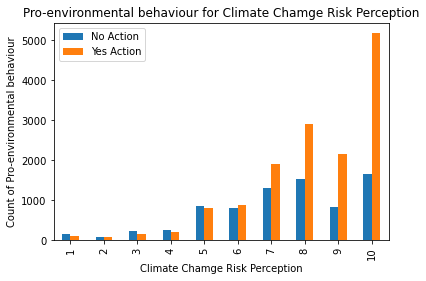

In [55]:
plt.figure(figsize=(10,5))

pd.crosstab(df.qb2, df.qb5).plot(kind='bar')
plt.title('Pro-environmental behaviour for Climate Chamge Risk Perception')
plt.xlabel('Climate Chamge Risk Perception')
plt.ylabel('Count of Pro-environmental behaviour')
plt.legend(["No Action", "Yes Action"]);
plt.savefig('qb5xqb2')


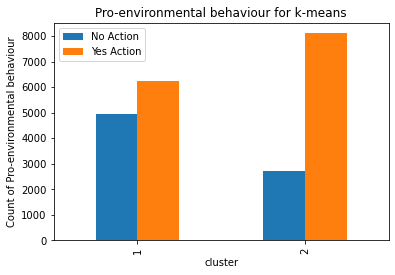

In [2]:
pd.crosstab(df['cluster'], df['qb5']).plot(kind='bar')
plt.title('Pro-environmental behaviour for k-means')
plt.xlabel('cluster')
plt.ylabel('Count of Pro-environmental behaviour')
plt.legend(["No Action", "Yes Action"]);
plt.savefig('qb5xcluster')


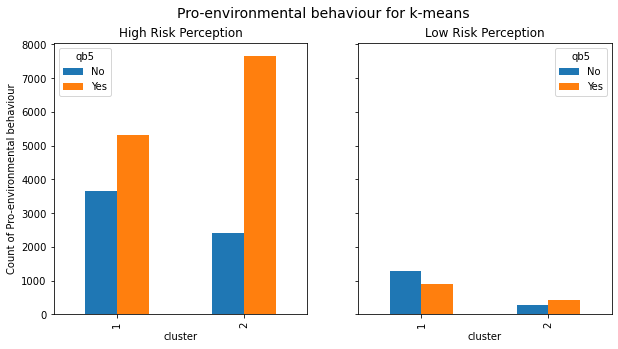

In [3]:
fig, (ax1, ax2) = plt.subplots(ncols=2, sharey=True, figsize = (10,5))         

pd.crosstab(df1['cluster'], df1['qb5']).plot(kind='bar', ax = ax1).set_title('High Risk Perception')
pd.crosstab(df2['cluster'], df2['qb5']).plot(kind='bar',ax= ax2).set_title('Low Risk Perception')
ax1.set_ylabel("Count of Pro-environmental behaviour")

plt.suptitle('Pro-environmental behaviour for k-means',fontsize = 14)
plt.savefig('Pro-environmental behaviour for k-means accoring to riskperc')



In [7]:
c = df.groupby('country').mean().reset_index()

print("average of chimate change risk perception is", c.qb2.mean())

average of chimate change risk perception is 7.9556402957609516


In [122]:
con = df.groupby('country').count().reset_index()

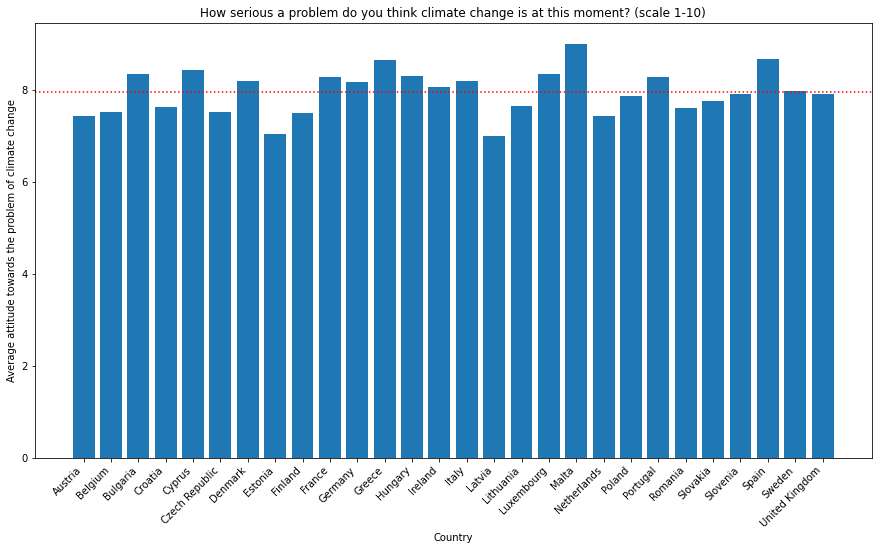

In [72]:
plt.figure(figsize=(15,8))

country = c.country
unit = c.qb2
 
# Plot the bar graph
plot = plt.bar(country, unit)


# Add labels and title
plt.title("How serious a problem do you think climate change is at this moment? (scale 1-10)")
plt.xlabel("Country")
plt.ylabel("Average attitude towards the problem of climate change")
plt.xticks(rotation=45, ha='right')



#####horizontal line
plt.axhline(y=c.qb2.mean(), color='r', linestyle='dotted')


# Display the graph on the screen
plt.show()

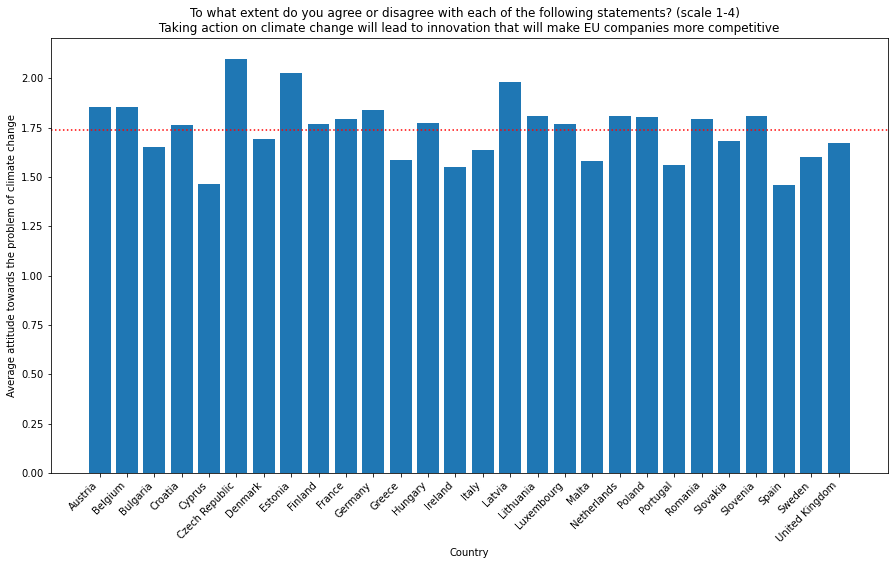

In [73]:
plt.figure(figsize=(15,8))

country = c.country
unit = c.qb4_3
 
# Plot the bar graph
plot = plt.bar(country, unit)


# Add labels and title
plt.title("To what extent do you agree or disagree with each of the following statements? (scale 1-4)  \n Taking action on climate change will lead to innovation that will make EU companies more competitive ")
plt.xlabel("Country")
plt.ylabel("Average attitude towards the problem of climate change")
plt.xticks(rotation=45, ha='right')



#####horizontal line
plt.axhline(y=c.qb4_3.mean(), color='r', linestyle='dotted')


# Display the graph on the screen
plt.show()

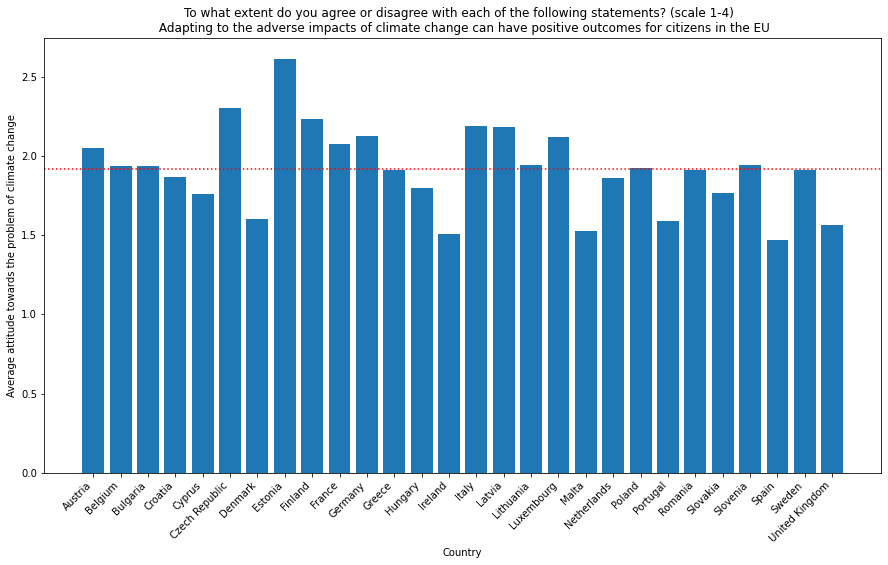

In [74]:
plt.figure(figsize=(15,8))

country = c.country
unit = c.qb4_5
 
# Plot the bar graph
plot = plt.bar(country, unit)


# Add labels and title
plt.title("To what extent do you agree or disagree with each of the following statements? (scale 1-4)  \n Adapting to the adverse impacts of climate change can have positive outcomes for citizens in the EU")
plt.xlabel("Country")
plt.ylabel("Average attitude towards the problem of climate change")
plt.xticks(rotation=45, ha='right')



#####horizontal line
plt.axhline(y=c.qb4_5.mean(), color='r', linestyle='dotted')


# Display the graph on the screen
plt.show()

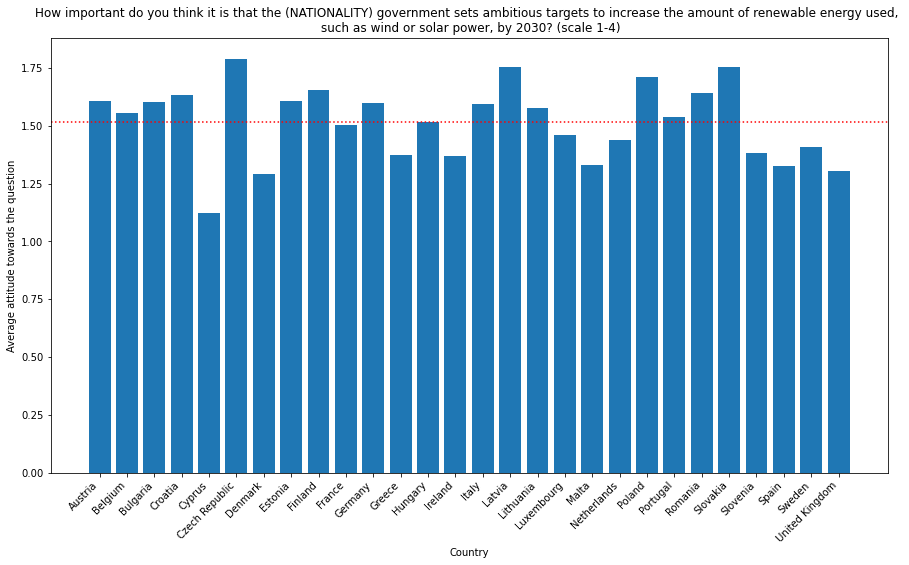

In [75]:
plt.figure(figsize=(15,8))

country = c.country
unit = c.qb7
 
# Plot the bar graph
plot = plt.bar(country, unit)


# Add labels and title
plt.title("How important do you think it is that the (NATIONALITY) government sets ambitious targets to increase the amount of renewable energy used, \n such as wind or solar power, by 2030? (scale 1-4)")
plt.xlabel("Country")
plt.ylabel("Average attitude towards the question")
plt.xticks(rotation=45, ha='right')



#####horizontal line
plt.axhline(y=c.qb7.mean(), color='r', linestyle='dotted')


# Display the graph on the screen
plt.show()

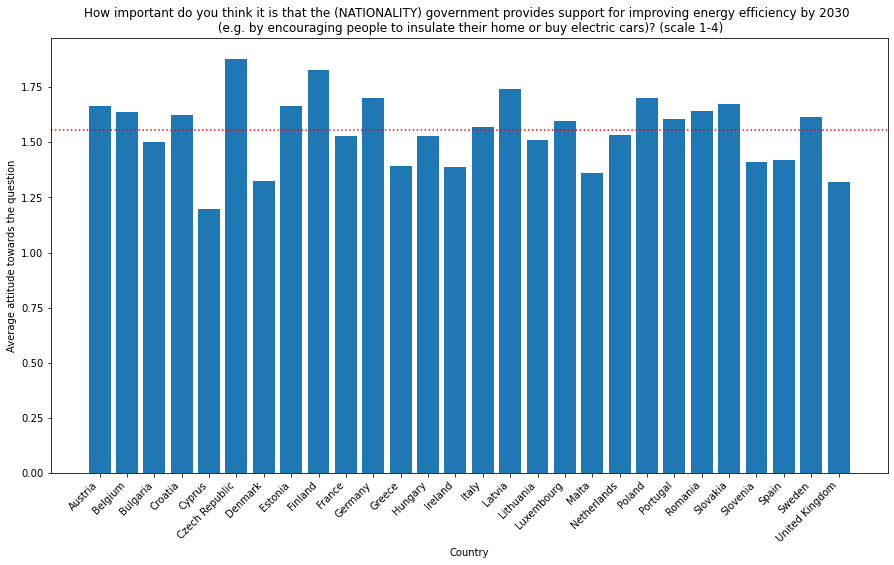

In [76]:
plt.figure(figsize=(15,8))

country = c.country
unit = c.qb8
 
# Plot the bar graph
plot = plt.bar(country, unit)


# Add labels and title
plt.title("How important do you think it is that the (NATIONALITY) government provides support for improving energy efficiency by 2030 \n (e.g. by encouraging people to insulate their home or buy electric cars)? (scale 1-4)")
plt.xlabel("Country")
plt.ylabel("Average attitude towards the question")
plt.xticks(rotation=45, ha='right')

#####horizontal line
plt.axhline(y=c.qb8.mean(), color='r', linestyle='dotted')


# Display the graph on the screen
plt.show()

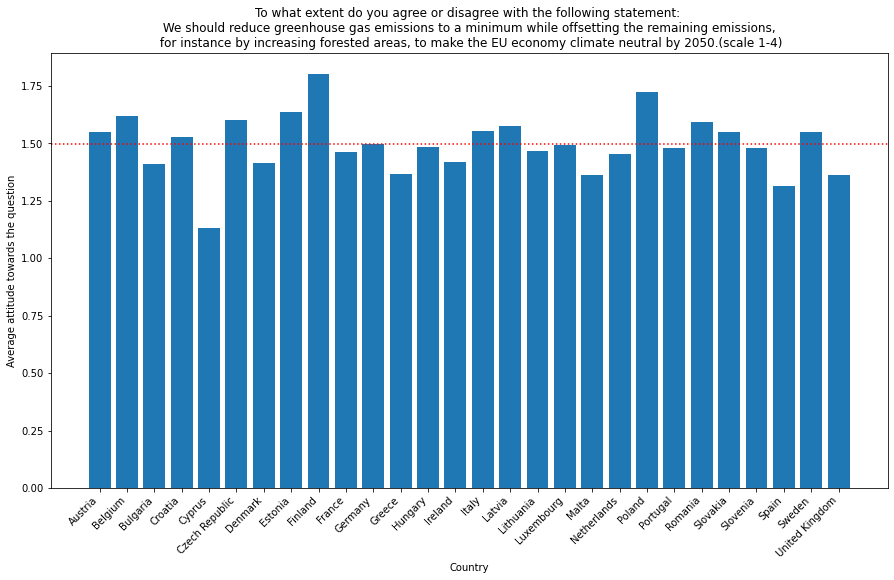

In [77]:
plt.figure(figsize=(15,8))

country = c.country
unit = c.qb9
 
# Plot the bar graph
plot = plt.bar(country, unit)


# Add labels and title
plt.title("To what extent do you agree or disagree with the following statement: \n We should reduce greenhouse gas emissions to a minimum while offsetting the remaining emissions, \n for instance by increasing forested areas, to make the EU economy climate neutral by 2050.(scale 1-4)")
plt.xlabel("Country")
plt.ylabel("Average attitude towards the question")
plt.xticks(rotation=45, ha='right')

#####horizontal line
plt.axhline(y=c.qb9.mean(), color='r', linestyle='dotted')


# Display the graph on the screen
plt.show()

In [78]:
print(c.qb4_5.mean()) #più alta
print(c.qb7.mean())
print(c.qb8.mean())
print(c.qb9.mean())

1.9139815243509068
1.5157515264070542
1.5560230984599275
1.4961609393826938


In [81]:
c = df.groupby(['country', 'qb4_3']).agg({'qb4_3': 'sum'})

# Change: groupby state_office and divide by sum
c = c.groupby(level=0).apply(lambda x:
                                                 100 * x / float(x.sum()))

c

qb4_3
country        qb4_3           
Austria        1      20.454545
               2      45.844156
               3      25.129870
               4       8.571429
Belgium        1      17.463849
...                         ...
Sweden         4       3.646564
United Kingdom 1      26.175439
               2      56.421053
               3      12.631579
               4       4.771930

[112 rows x 1 columns]

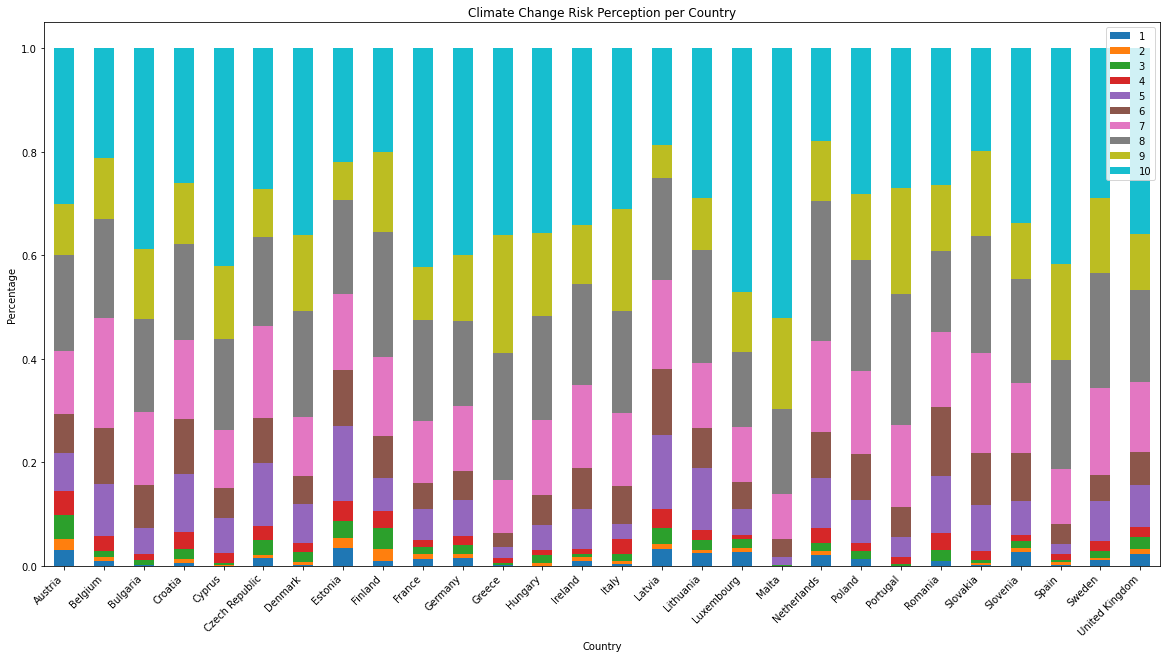

In [63]:
freq_df =  df.groupby(['country'])['qb2'].value_counts().unstack()
#freq_df = freq_df[['low', 'medium', 'high']]
pct_df = freq_df.divide(freq_df.sum(axis=1), axis=0)
#my_colors = [(x/10.0, x/20.0, 0.75) for x in range(len(df))] # <-- Quick gradient example along the Red/Green dimensions.

pct_df.plot(kind="bar", stacked=True)

plt.legend(loc='upper right')
   
plt.gcf().set_size_inches(20, 10)


# Add labels and title
plt.title("Climate Change Risk Perception per Country")
plt.xlabel("Country")
plt.ylabel("Percentage")
plt.xticks(rotation=45, ha='right')

#plt.savefig('Climate Change Risk Perception per Country.png', bbox_inches='tight')
# Display the graph on the screen
plt.show()



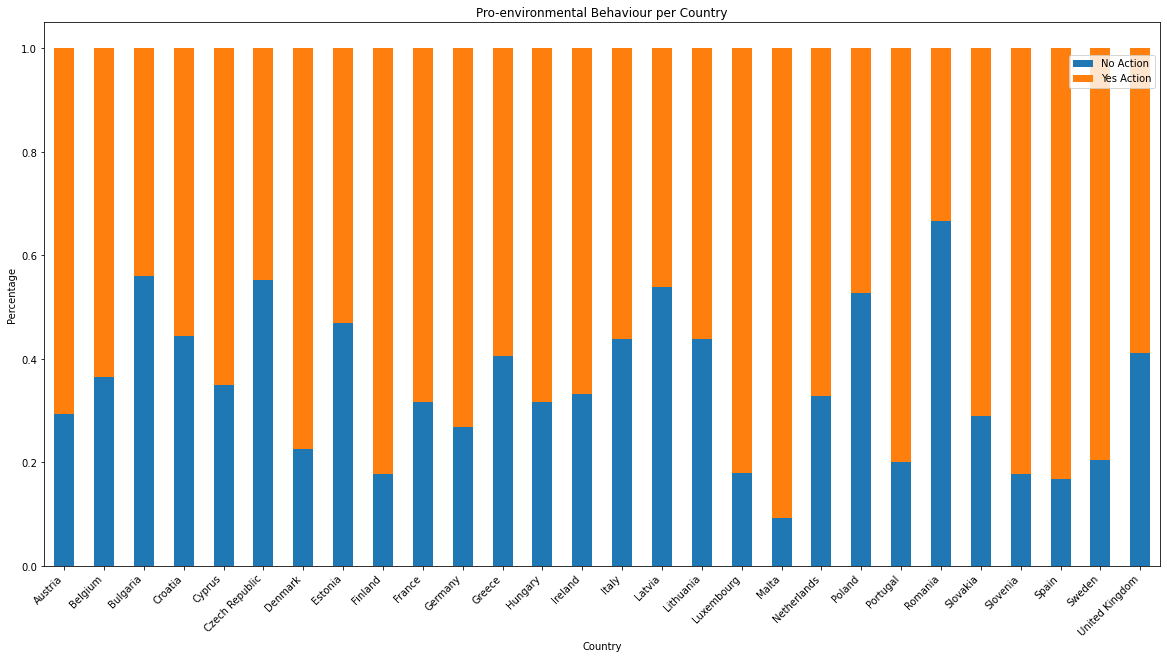

In [80]:
freq_df =  df.groupby(['country'])['qb5'].value_counts().unstack()


pct_df = freq_df.divide(freq_df.sum(axis=1), axis=0)
ax = pct_df.plot(kind="bar", stacked=True)
   
plt.gcf().set_size_inches(20, 10)


# Add labels and title
plt.title("Pro-environmental Behaviour per Country")
plt.xlabel("Country")
plt.ylabel("Percentage")
plt.xticks(rotation=45, ha='right')
ax.legend(["No Action", "Yes Action"], bbox_to_anchor=(1,0.95), loc="upper right");

plt.savefig('Pro-environmental Behaviour per Country.png', bbox_inches='tight')
# Display the graph on the screen
plt.show()


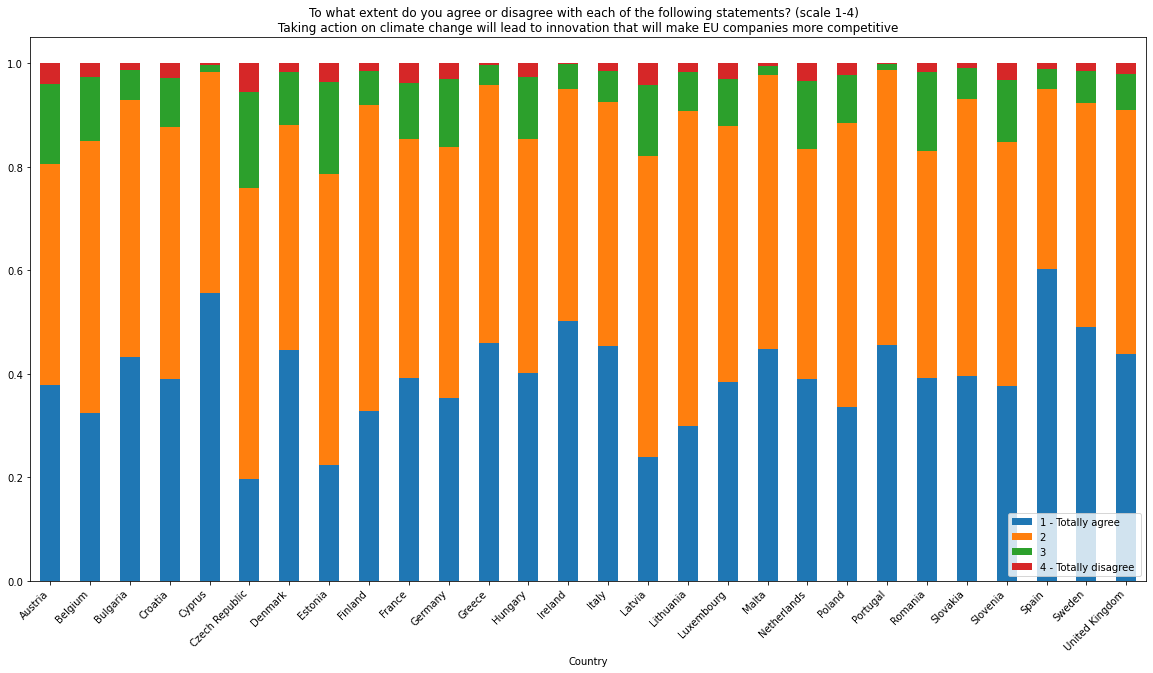

In [83]:
freq_df =  df.groupby(['country'])['qb4_3'].value_counts().unstack()
pct_df = freq_df.divide(freq_df.sum(axis=1), axis=0)
ax = pct_df.plot(kind="bar", stacked=True)

plt.legend(loc='upper right')
   
plt.gcf().set_size_inches(20, 10)


# Add labels and title
plt.title("To what extent do you agree or disagree with each of the following statements? (scale 1-4)  \n Taking action on climate change will lead to innovation that will make EU companies more competitive ")
plt.xlabel("Country")
#plt.ylabel("Average attitude towards the problem of climate change")
plt.xticks(rotation=45, ha='right')
ax.legend(["1 - Totally agree", "2", "3", "4 - Totally disagree "], bbox_to_anchor=(1,0), loc="lower right");


# Display the graph on the screen
plt.show()

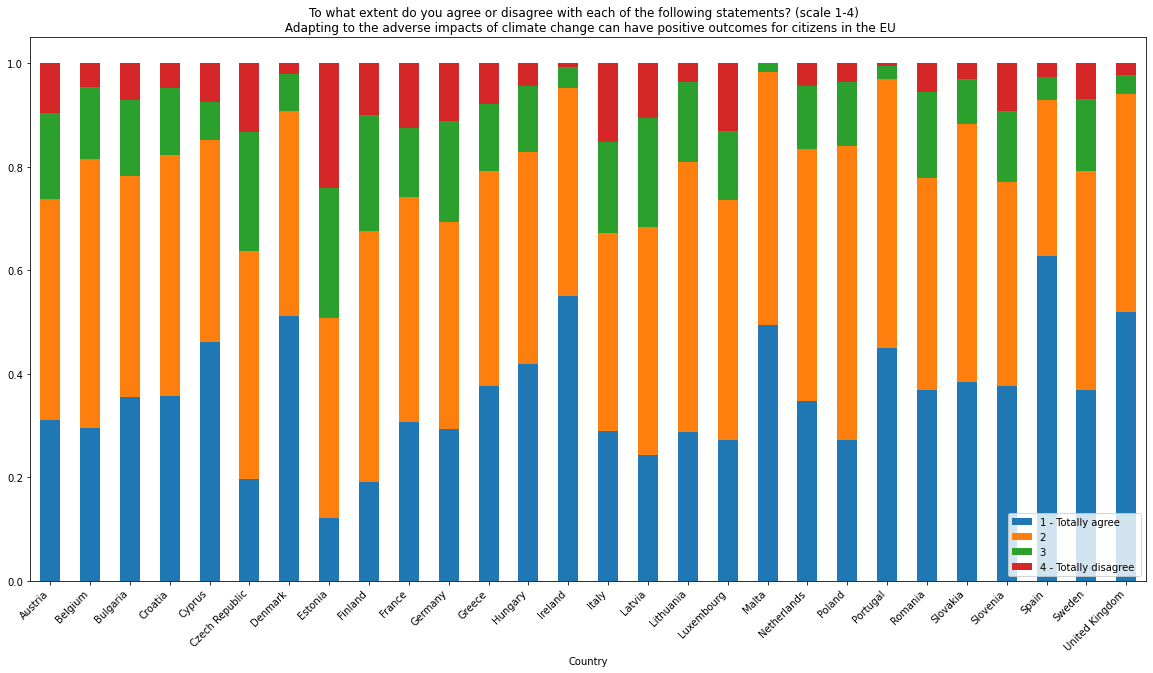

In [84]:
freq_df =  df.groupby(['country'])['qb4_5'].value_counts().unstack()
pct_df = freq_df.divide(freq_df.sum(axis=1), axis=0)
ax = pct_df.plot(kind="bar", stacked=True)

plt.legend(loc='upper right')
   
plt.gcf().set_size_inches(20, 10)


# Add labels and title
plt.title("To what extent do you agree or disagree with each of the following statements? (scale 1-4)  \n Adapting to the adverse impacts of climate change can have positive outcomes for citizens in the EU")
plt.xlabel("Country")
#plt.ylabel("Average attitude towards the problem of climate change")
plt.xticks(rotation=45, ha='right')

ax.legend(["1 - Totally agree", "2", "3", "4 - Totally disagree "], bbox_to_anchor=(1,0), loc="lower right");

# Display the graph on the screen
plt.show()

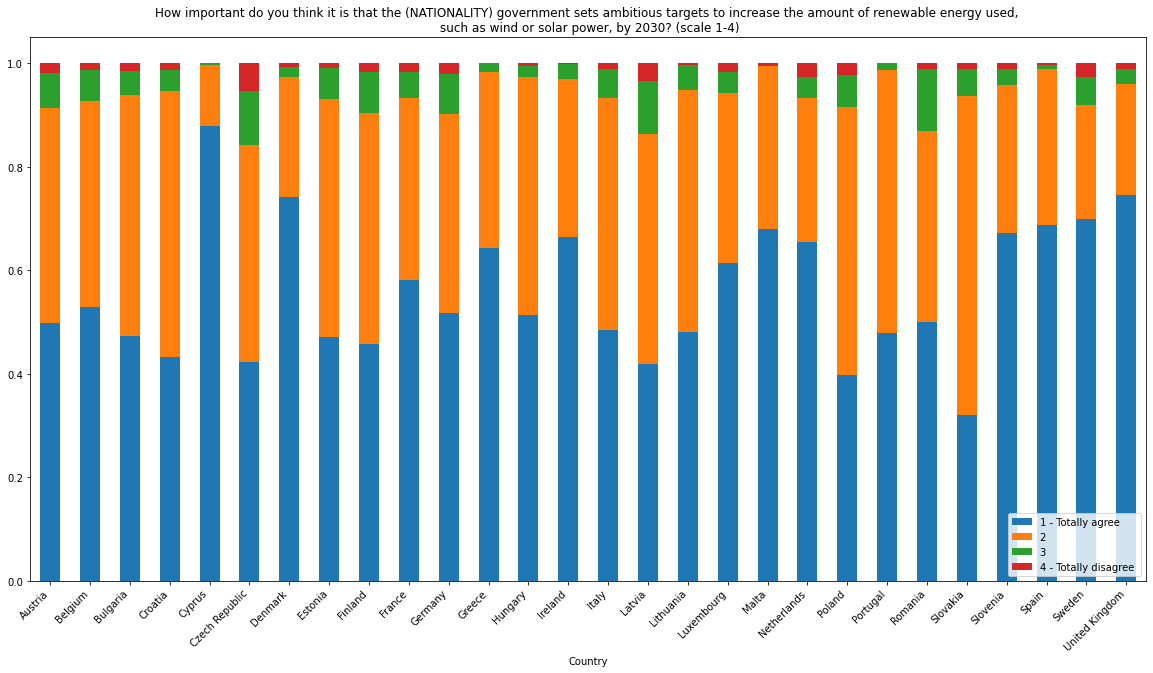

In [85]:
freq_df =  df.groupby(['country'])['qb7'].value_counts().unstack()
pct_df = freq_df.divide(freq_df.sum(axis=1), axis=0)
ax = pct_df.plot(kind="bar", stacked=True)

plt.legend(loc='upper right')
   
plt.gcf().set_size_inches(20, 10)


# Add labels and title
plt.title("How important do you think it is that the (NATIONALITY) government sets ambitious targets to increase the amount of renewable energy used, \n such as wind or solar power, by 2030? (scale 1-4)")
plt.xlabel("Country")
#plt.ylabel("Average attitude towards the problem of climate change")
plt.xticks(rotation=45, ha='right')

ax.legend(["1 - Totally agree", "2", "3", "4 - Totally disagree "], bbox_to_anchor=(1,0), loc="lower right");

# Display the graph on the screen
plt.show()

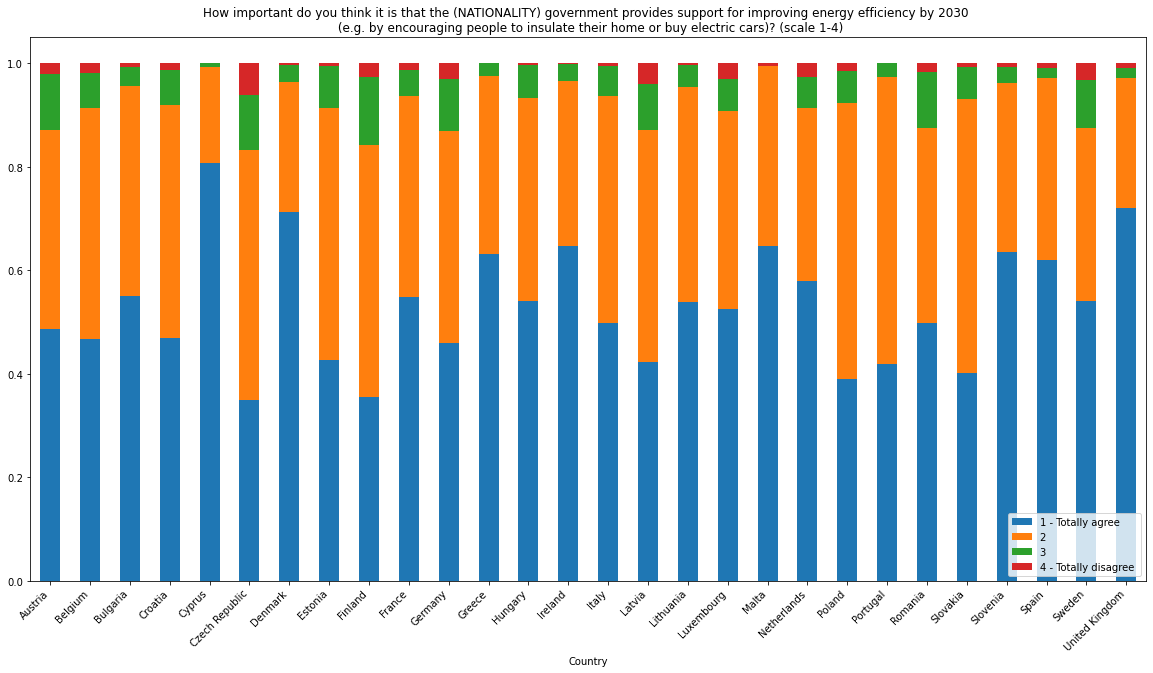

In [86]:
freq_df =  df.groupby(['country'])['qb8'].value_counts().unstack()
pct_df = freq_df.divide(freq_df.sum(axis=1), axis=0)
ax = pct_df.plot(kind="bar", stacked=True)

plt.legend(loc='upper right')
   
plt.gcf().set_size_inches(20, 10)


# Add labels and title
plt.title("How important do you think it is that the (NATIONALITY) government provides support for improving energy efficiency by 2030 \n (e.g. by encouraging people to insulate their home or buy electric cars)? (scale 1-4)")
plt.xlabel("Country")
#plt.ylabel("Average attitude towards the problem of climate change")
plt.xticks(rotation=45, ha='right')
ax.legend(["1 - Totally agree", "2", "3", "4 - Totally disagree "], bbox_to_anchor=(1,0), loc="lower right");


# Display the graph on the screen
plt.show()

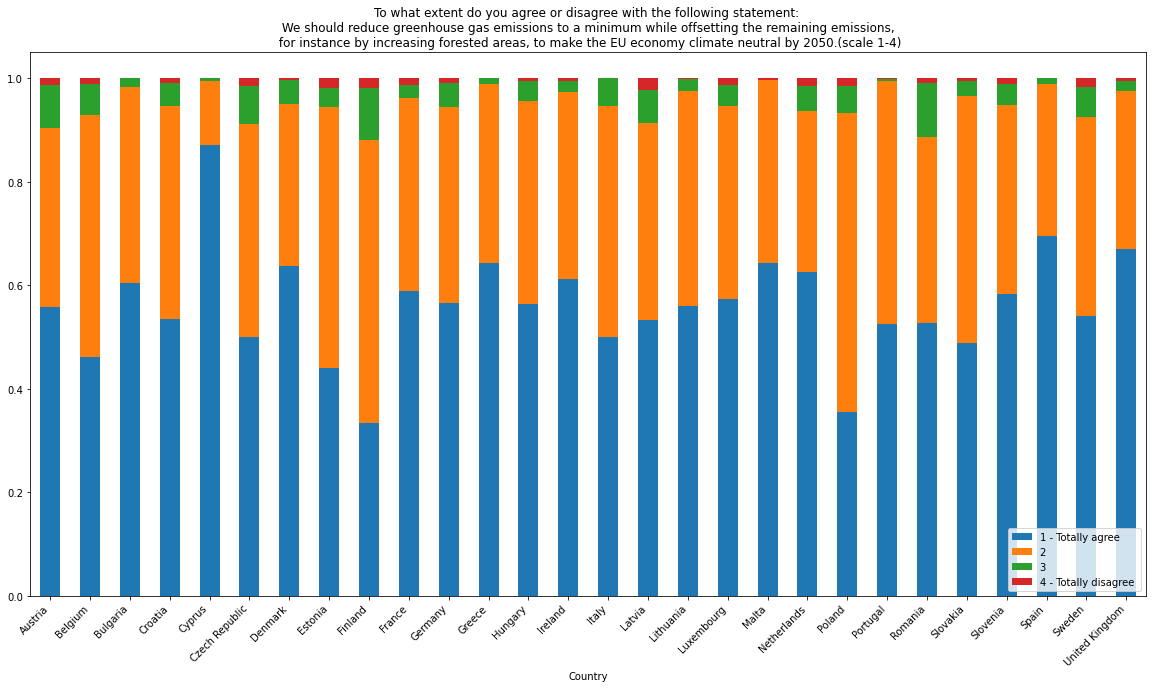

In [87]:
freq_df =  df.groupby(['country'])['qb9'].value_counts().unstack()
pct_df = freq_df.divide(freq_df.sum(axis=1), axis=0)
ax = pct_df.plot(kind="bar", stacked=True)

   
plt.gcf().set_size_inches(20, 10)


# Add labels and title
plt.title("To what extent do you agree or disagree with the following statement: \n We should reduce greenhouse gas emissions to a minimum while offsetting the remaining emissions, \n for instance by increasing forested areas, to make the EU economy climate neutral by 2050.(scale 1-4)")
plt.xlabel("Country")
#plt.ylabel("Average attitude towards the problem of climate change")
plt.xticks(rotation=45, ha='right')

ax.legend(["1 - Totally agree", "2", "3", "4 - Totally disagree "], bbox_to_anchor=(1,0), loc="lower right");

# Display the graph on the screen
plt.show()



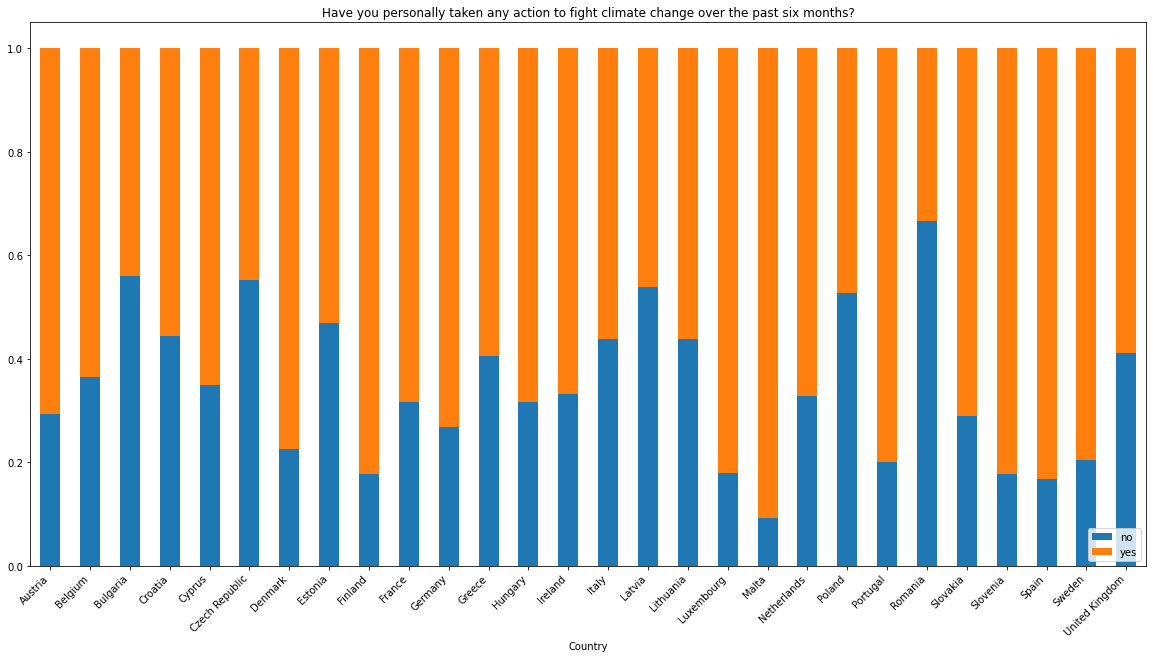

In [88]:
freq_df =  df.groupby(['country'])['qb5'].value_counts().unstack()
pct_df = freq_df.divide(freq_df.sum(axis=1), axis=0)
ax = pct_df.plot(kind="bar", stacked=True)

   
plt.gcf().set_size_inches(20, 10)


# Add labels and title
plt.title("Have you personally taken any action to fight climate change over the past six months?")
plt.xlabel("Country")
#plt.ylabel("Average attitude towards the problem of climate change")
plt.xticks(rotation=45, ha='right')

ax.legend(["no", "yes",], bbox_to_anchor=(1,0), loc="lower right");

# Display the graph on the screen
plt.show()



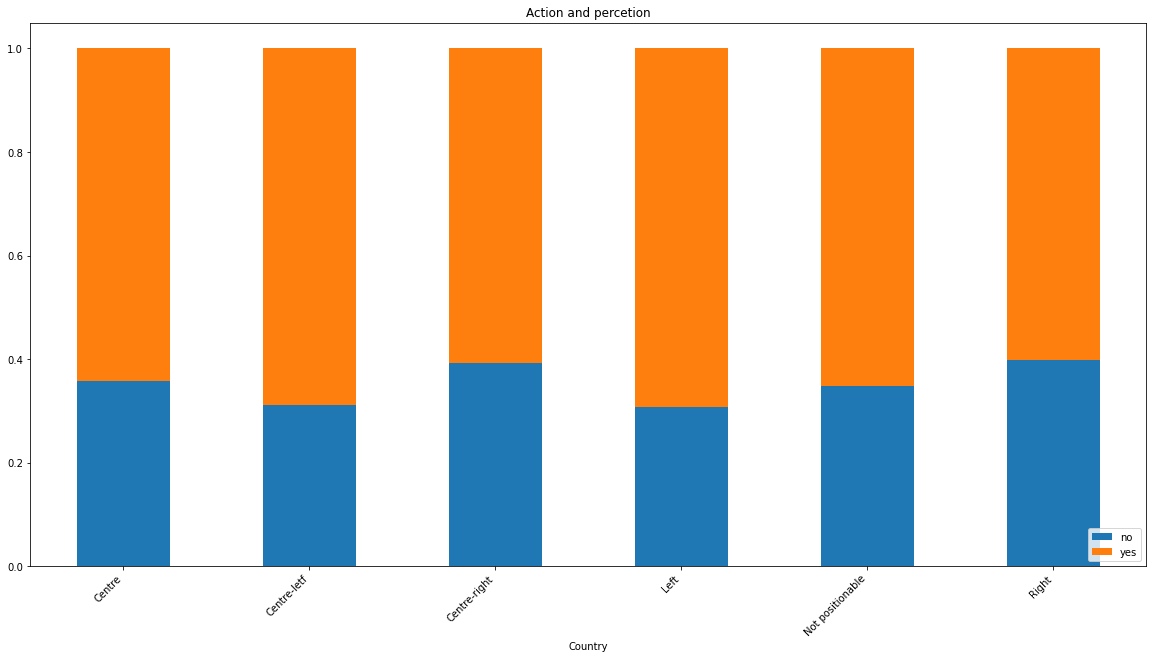

In [90]:
freq_df =  df.groupby(['d1'])['qb5'].value_counts().unstack()
pct_df = freq_df.divide(freq_df.sum(axis=1), axis=0)
ax = pct_df.plot(kind="bar", stacked=True)

   
plt.gcf().set_size_inches(20, 10)


# Add labels and title
plt.title("Action and percetion")
plt.xlabel("Country")
#plt.ylabel("Average attitude towards the problem of climate change")
plt.xticks(rotation=45, ha='right')

ax.legend(["no", "yes"], bbox_to_anchor=(1,0), loc="lower right");

# Display the graph on the screen
plt.show()


#### Plot cluster 

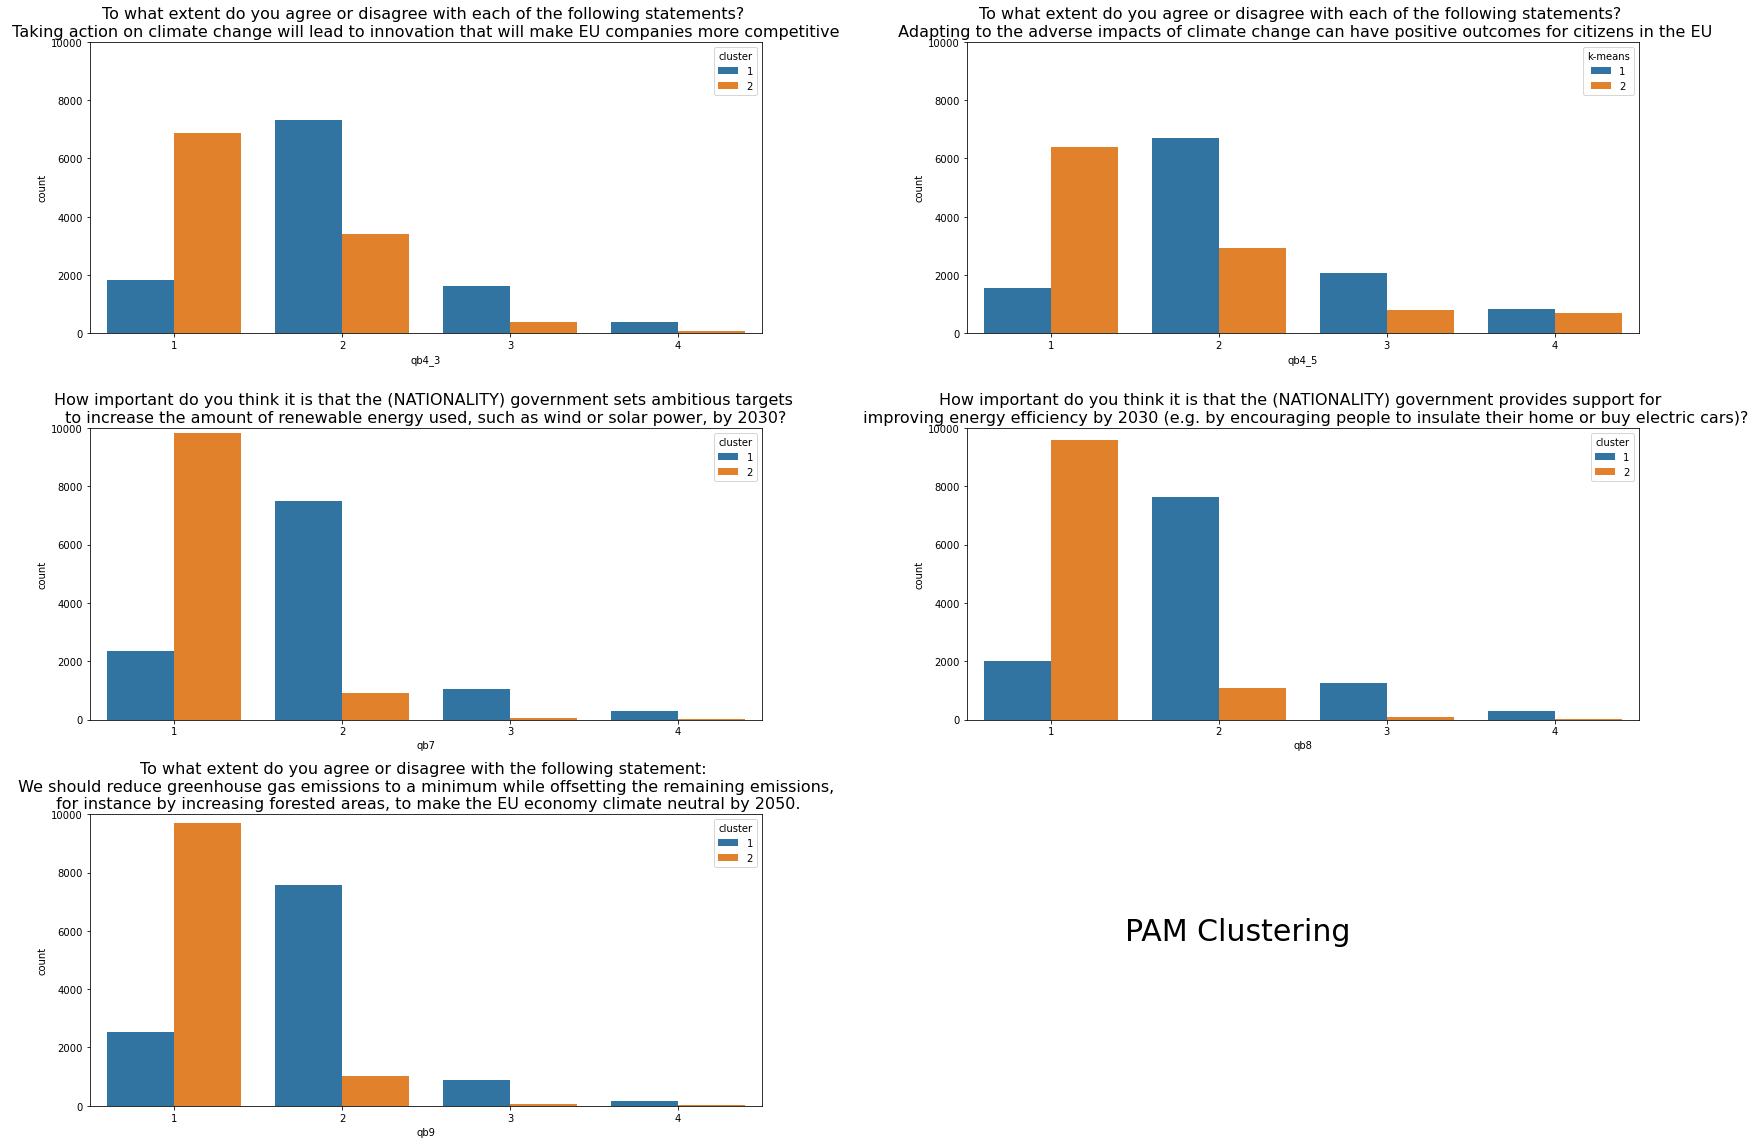

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt

f, axes = plt.subplots(3, 2, figsize=(25, 16))

sns.countplot(x=df['qb4_3'],hue=df['cluster'], ax= axes[0, 0]).set_title('To what extent do you agree or disagree with each of the following statements? \n Taking action on climate change will lead to innovation that will make EU companies more competitive ',fontsize=16) 
sns.countplot(x=df['qb4_5'],hue=df['cluster'], ax=axes[0, 1]).set_title("To what extent do you agree or disagree with each of the following statements? \n Adapting to the adverse impacts of climate change can have positive outcomes for citizens in the EU",fontsize=16)
sns.countplot(x=df['qb7'],hue=df['cluster'], ax=axes[1, 0]).set_title("How important do you think it is that the (NATIONALITY) government sets ambitious targets \n to increase the amount of renewable energy used, such as wind or solar power, by 2030? ",fontsize=16)
sns.countplot(x=df['qb8'],hue=df['cluster'],ax= axes[1, 1]).set_title("How important do you think it is that the (NATIONALITY) government provides support for \n improving energy efficiency by 2030 (e.g. by encouraging people to insulate their home or buy electric cars)?",fontsize=16)
sns.countplot(x=df['qb9'],hue=df['cluster'], ax=axes[2, 0]).set_title("To what extent do you agree or disagree with the following statement: \n We should reduce greenhouse gas emissions to a minimum while offsetting the remaining emissions, \n for instance by increasing forested areas, to make the EU economy climate neutral by 2050.",fontsize=16)

axes[0, 0].set_ylim(0,10000)
axes[0, 1].set_ylim(0,10000)
axes[1, 0].set_ylim(0,10000)
axes[1, 1].set_ylim(0,10000)
axes[2, 0].set_ylim(0,10000)

#axes[0, 0].set_xticklabels(['1','2','3','4'])

axes[0, 1].legend(loc = 'upper right', title='k-means')

f.delaxes(axes[2,1]) #The indexing is zero-based here

f.suptitle('PAM Clustering', fontsize = 30, x = 0.7, y = 0.2) 


plt.tight_layout()

plt.savefig('PAM_clustering.png')
plt.show()

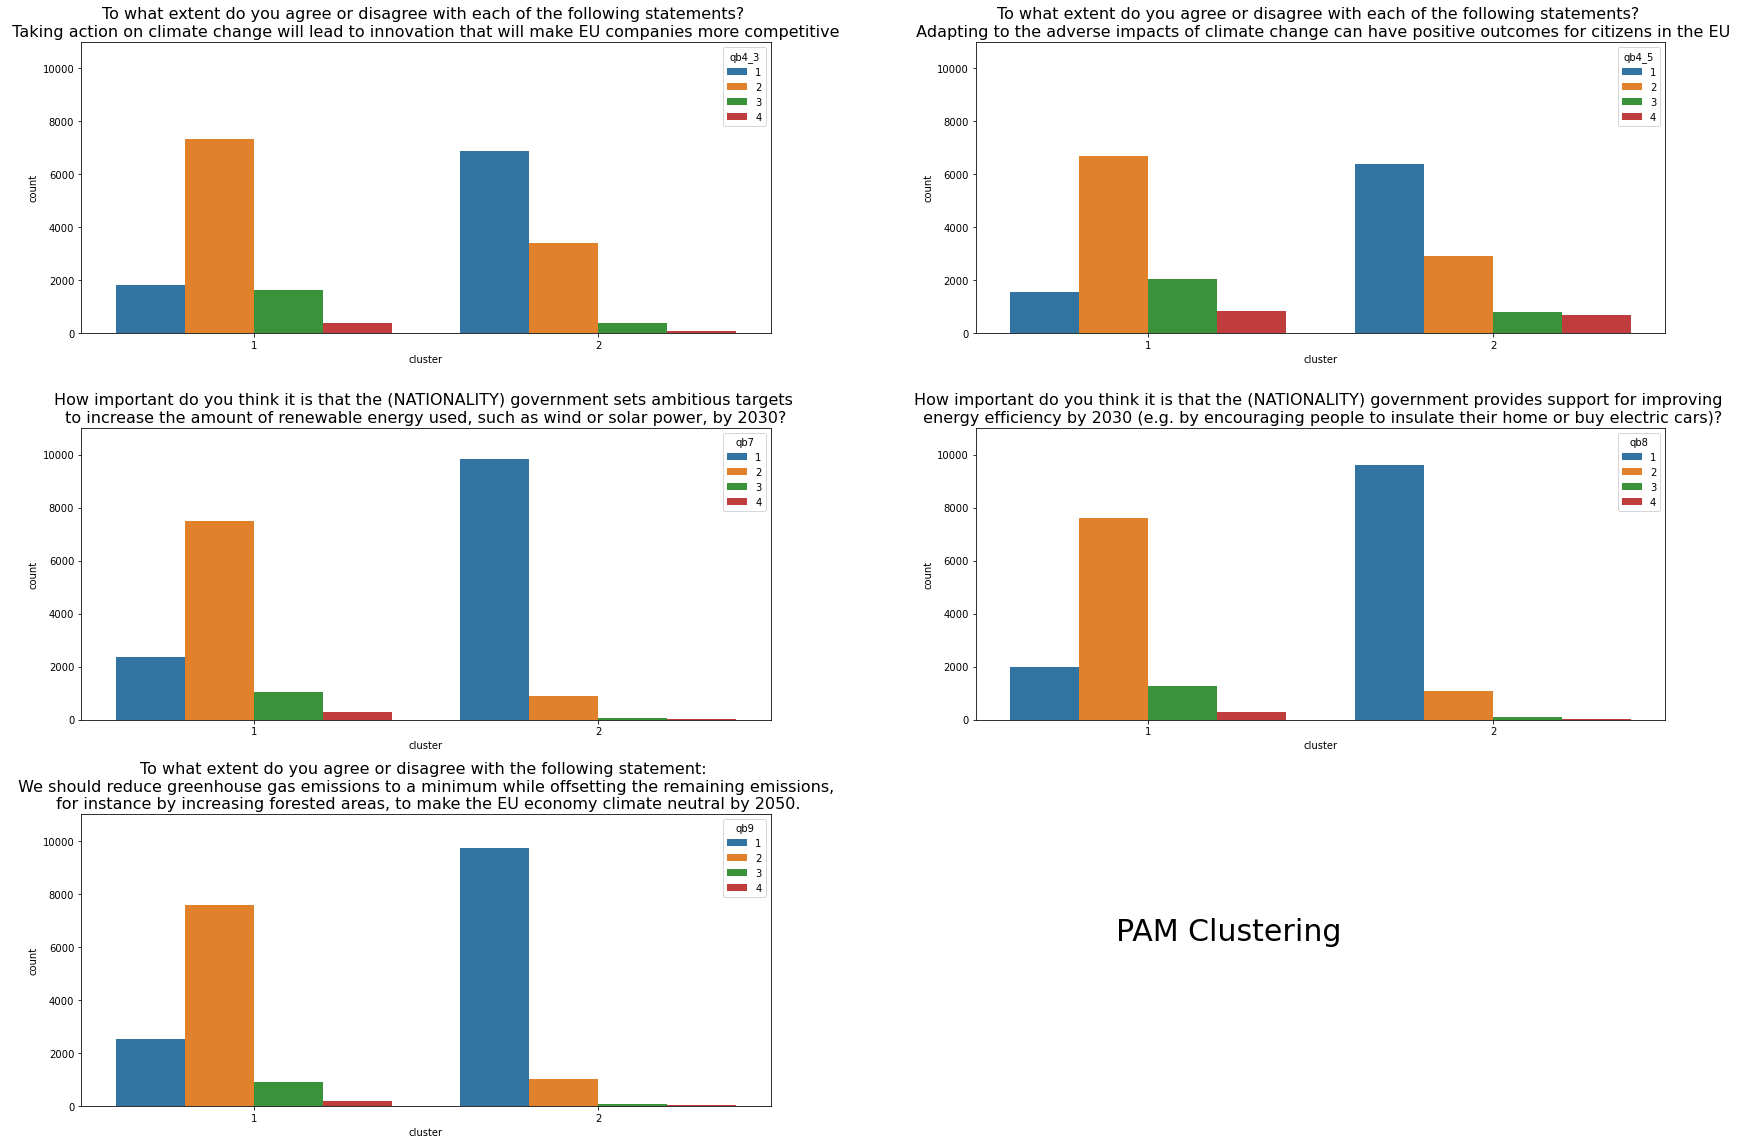

In [43]:
f, axes = plt.subplots(3, 2, figsize=(25, 16))

sns.countplot(x=df['cluster'],hue=df['qb4_3'], ax= axes[0, 0]).set_title('To what extent do you agree or disagree with each of the following statements? \n Taking action on climate change will lead to innovation that will make EU companies more competitive ',fontsize=16) 
sns.countplot(x=df['cluster'],hue=df['qb4_5'], ax=axes[0, 1]).set_title("To what extent do you agree or disagree with each of the following statements? \n Adapting to the adverse impacts of climate change can have positive outcomes for citizens in the EU",fontsize=16)
sns.countplot(x=df['cluster'],hue=df['qb7'], ax=axes[1, 0]).set_title("How important do you think it is that the (NATIONALITY) government sets ambitious targets \n to increase the amount of renewable energy used, such as wind or solar power, by 2030? ",fontsize=16)
sns.countplot(x=df['cluster'],hue=df['qb8'],ax= axes[1, 1]).set_title("How important do you think it is that the (NATIONALITY) government provides support for improving \n energy efficiency by 2030 (e.g. by encouraging people to insulate their home or buy electric cars)?",fontsize=16)
sns.countplot(x=df['cluster'],hue=df['qb9'], ax=axes[2, 0]).set_title("To what extent do you agree or disagree with the following statement: \n We should reduce greenhouse gas emissions to a minimum while offsetting the remaining emissions, \n for instance by increasing forested areas, to make the EU economy climate neutral by 2050.",fontsize=16)

axes[0, 0].set_ylim(0,11000)
axes[0, 1].set_ylim(0,11000)
axes[1, 0].set_ylim(0,11000)
axes[1, 1].set_ylim(0,11000)
axes[2, 0].set_ylim(0,11000)

axes[0, 1].legend(loc = 'upper right', title='qb4_5')

f.delaxes(axes[2,1]) #The indexing is zero-based here

f.suptitle('PAM Clustering', fontsize = 30, x = 0.7, y = 0.2) 


plt.tight_layout()

plt.savefig('PAM_clustering2.png')
plt.show()

In [44]:
df.groupby(['cluster', 'd10']).count()

qb1a   qb2   qb5  qb4_3  qb4_5   qb7   qb8   qb9    d1   d11  \
cluster d10                                                                   
1       Man    5460  5460  5460   5460   5460  5460  5460  5460  5460  5460   
        Woman  5711  5711  5711   5711   5711  5711  5711  5711  5711  5711   
2       Man    5067  5067  5067   5067   5067  5067  5067  5067  5067  5067   
        Woman  5740  5740  5740   5740   5740  5740  5740  5740  5740  5740   

                d25    d8   d63    d7  country   cca  
cluster d10                                           
1       Man    5460  5460  5460  5460     5460  5460  
        Woman  5711  5711  5711  5711     5711  5711  
2       Man    5067  5067  5067  5067     5067  5067  
        Woman  5740  5740  5740  5740     5740  5740

In [45]:
state_polor= df.groupby(['cluster', 'd1']).agg({'qb2': 'sum'})
# Change: groupby state_office and divide by sum
state_pcts = state_polor.groupby(level=0).apply(lambda x:
                                                 100 * x / float(x.sum()))
state_pcts

qb2
cluster d1                         
1       Centre            27.353457
        Centre-letf       26.330508
        Centre-right      17.711489
        Left               7.077236
        Not positionable  14.122582
        Right              7.404727
2       Centre            26.142427
        Centre-letf       27.546256
        Centre-right      12.842083
        Left              10.250645
        Not positionable  15.769148
        Right              7.449441

In [54]:
state= df.groupby(['cluster', 'd7']).agg({'qb2': 'sum'})
# Change: groupby state_office and divide by sum
state_pcts = state.groupby(level=0).apply(lambda x:
                                                 100 * x / float(x.sum()))
state_pcts

qb2
cluster d7                             
1       Partner               35.886617
        Partner and children  31.499221
        Refusal/Other          0.494303
        Single                27.327699
        Single with children   4.792160
2       Partner               34.566480
        Partner and children  32.865749
        Refusal/Other          0.341007
        Single                26.851334
        Single with children   5.375430

In [53]:
state= df.groupby(['cluster', 'd8']).agg({'qb2': 'sum'})
# Change: groupby state_office and divide by sum
state_pcts = state.groupby(level=0).apply(lambda x:
                                                 100 * x / float(x.sum()))
state_pcts

qb2
cluster d8                           
1       16-19 years old     45.327430
        20+ years old       34.907824
        Refusal/dk           1.399502
        Still studying       5.781992
        Up to 15 years old  12.583253
2       16-19 years old     38.857573
        20+ years old       41.244621
        Refusal/dk           1.327453
        Still studying       7.111661
        Up to 15 years old  11.458692

In [52]:
state= df.groupby(['cluster', 'd63']).agg({'qb2': 'sum'})
# Change: groupby state_office and divide by sum
state_pcts = state.groupby(level=0).apply(lambda x:
                                                 100 * x / float(x.sum()))
state_pcts

qb2
cluster d63                                         
1       Refusal/Other                       2.271584
        The higher class of society         0.510248
        The lower middle class of society  17.035656
        The middle class of society        48.534877
        The upper middle class of society   6.266482
        The working class of society       25.381153
2       Refusal/Other                       2.451592
        The higher class of society         0.878873
        The lower middle class of society  14.327668
        The middle class of society        51.004733
        The upper middle class of society   8.463855
        The working class of society       22.873279

In [11]:
df.groupby(['cluster', 'qb2']).count()

qb1a   qb5  qb4_3  qb4_5   qb7   qb8   qb9    d1   d10   d11  \
cluster qb2                                                                 
1       1     207   207    207    207   207   207   207   207   207   207   
        2     128   128    128    128   128   128   128   128   128   128   
        3     304   304    304    304   304   304   304   304   304   304   
        4     378   378    378    378   378   378   378   378   378   378   
        5    1172  1172   1172   1172  1172  1172  1172  1172  1172  1172   
        6    1176  1176   1176   1176  1176  1176  1176  1176  1176  1176   
        7    2093  2093   2093   2093  2093  2093  2093  2093  2093  2093   
        8    2354  2354   2354   2354  2354  2354  2354  2354  2354  2354   
        9    1347  1347   1347   1347  1347  1347  1347  1347  1347  1347   
        10   2012  2012   2012   2012  2012  2012  2012  2012  2012  2012   
2       1      57    57     57     57    57    57    57    57    57    57   
        2      29    29     29     29    29    29    29    29    29    29   
        3      63    63     63     63    63    63    63    63    63    63   
        4      85    85     85     85    85    85    85    85    85    85   
        5     483   483    483    483   483   483   483   483   483   483   
        6     495   495    495    495   495   495   495   495   495   495   
        7    1089  1089   1089   1089  1089  1089  1089  1089  1089  1089   
        8    2067  2067   2067   2067  2067  2067  2067  2067  2067  2067   
        9    1618  1618   1618   1618  1618  1618  1618  1618  1618  1618   
        10   4821  4821   4821   4821  4821  4821  4821  4821  4821  4821   

              d25    d8   d63    d7  country   cca  
cluster qb2                                         
1       1     207   207   207   207      207   207  
        2     128   128   128   128      128   128  
        3     304   304   304   304      304   304  
        4     378   378   378   378      378   378  
        5    1172  1172  1172  1172     1172  1172  
        6    1176  1176  1176  1176     1176  1176  
        7    2093  2093  2093  2093     2093  2093  
        8    2354  2354  2354  2354     2354  2354  
        9    1347  1347  1347  1347     1347  1347  
        10   2012  2012  2012  2012     2012  2012  
2       1      57    57    57    57       57    57  
        2      29    29    29    29       29    29  
        3      63    63    63    63       63    63  
        4      85    85    85    85       85    85  
        5     483   483   483   483      483   483  
        6     495   495   495   495      495   495  
        7    1089  1089  1089  1089     1089  1089  
        8    2067  2067  2067  2067     2067  2067  
        9    1618  1618  1618  1618     1618  1618  
        10   4821  4821  4821  4821     4821  4821

In [25]:
df.groupby(['cluster']).mean()

,qb2,qb4_3,qb4_5,qb7,qb8,qb9,d11,cca
cluster,,,,,,,,
1,7.298272,2.050488,2.194701,1.934473,1.986662,1.883717,51.099543,2.673440
2,8.601832,1.418340,1.611178,1.095864,1.125474,1.109281,49.904969,2.635421


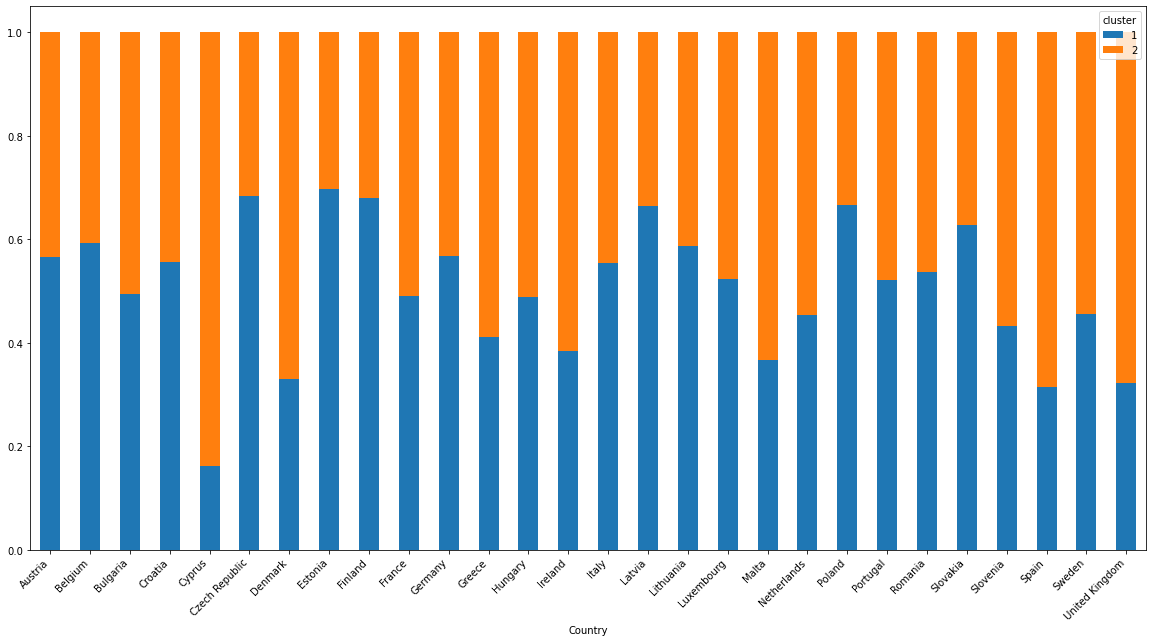

In [19]:

freq_df =  df.groupby(['country'])['cluster'].value_counts().unstack()
pct_df = freq_df.divide(freq_df.sum(axis=1), axis=0)
ax = pct_df.plot(kind="bar", stacked=True)

   
plt.gcf().set_size_inches(20, 10)

# Add labels and title
plt.xlabel("Country")
#plt.ylabel("Average attitude towards the problem of climate change")
plt.xticks(rotation=45, ha='right')
# Display the graph on the screen
plt.show()

#### CCA

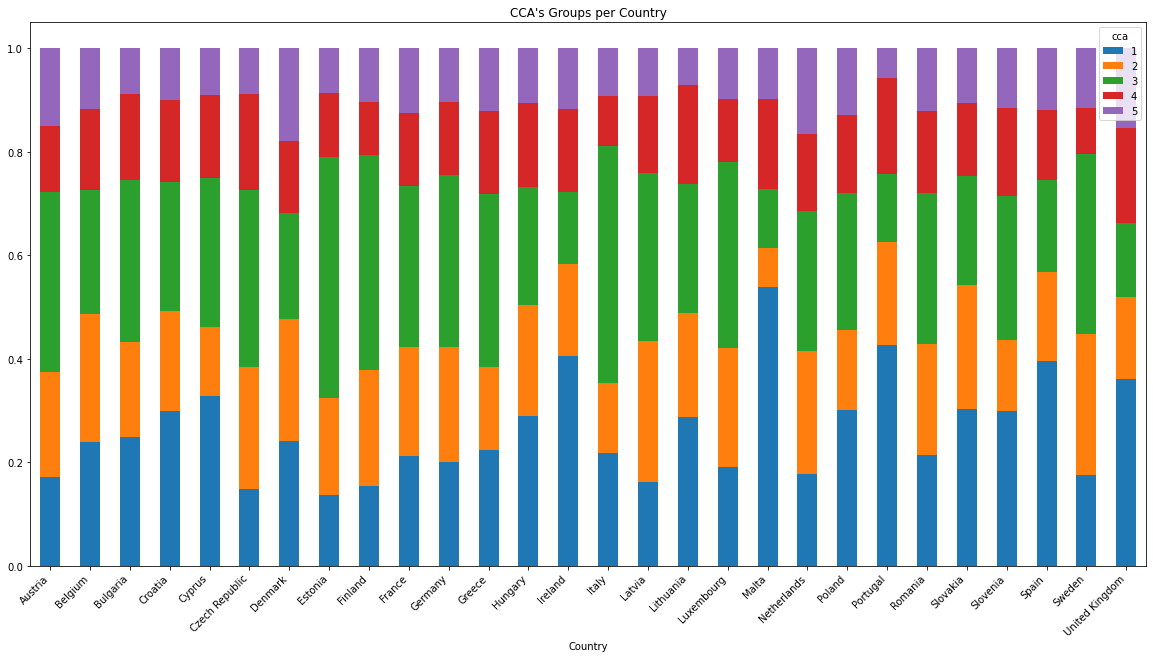

In [2]:
freq_df =  df.groupby(['country'])['cca'].value_counts().unstack()
pct_df = freq_df.divide(freq_df.sum(axis=1), axis=0)
ax = pct_df.plot(kind="bar", stacked=True)

   
plt.gcf().set_size_inches(20, 10)


# Add labels and title
plt.title("CCA's Groups per Country")
plt.xlabel("Country")
#plt.ylabel("Average attitude towards the problem of climate change")
plt.xticks(rotation=45, ha='right')


#save 
plt.savefig('cca_country.png')

# Display the graph on the screen
plt.show()


In [3]:
pct_df

cca,1,2,3,4,5
country,,,,,
Austria,0.171084,0.203614,0.346988,0.127711,0.150602
Belgium,0.239175,0.247423,0.240206,0.155670,0.117526
Bulgaria,0.249201,0.183706,0.313099,0.166134,0.087859
Croatia,0.299779,0.192478,0.248894,0.159292,0.099558
Cyprus,0.328467,0.133820,0.287105,0.160584,0.090024
Czech Republic,0.149520,0.234568,0.341564,0.185185,0.089163
Denmark,0.241955,0.235995,0.203814,0.139452,0.178784
Estonia,0.136538,0.188462,0.465385,0.123077,0.086538
Finland,0.153656,0.224287,0.416357,0.101611,0.104089


#### Some maps

In [91]:
#map 
c = cc_num.groupby('country').mean().reset_index()


In [92]:
c#function to convert to alpah2 country codes and continents
from pycountry_convert import country_alpha2_to_continent_code, country_name_to_country_alpha2
def get_continent(col):
    try:
        cn_a2_code =  country_name_to_country_alpha2(col)
    except:
        cn_a2_code = 'Unknown' 
    try:
        cn_continent = country_alpha2_to_continent_code(cn_a2_code)
    except:
        cn_continent = 'Unknown' 
    return (cn_a2_code, cn_continent)

In [93]:
get_continent(c.country)

('Unknown', 'Unknown')

In [94]:
from geopy.geocoders import Nominatim
geolocator = Nominatim()

c['lat'] = np.nan
c['long'] = np.nan
for i in range(len(c)):
        # Geolocate the center of the country
    loc = geolocator.geocode(c.country[i])
        # And return latitude and longitude
    c['lat'][i] = float(loc.latitude)
    c['long'][i] = float(loc.longitude)


C:\Users\giusp\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: Using Nominatim with the default "geopy/1.20.0" `user_agent` is strongly discouraged, as it violates Nominatim's ToS https://operations.osmfoundation.org/policies/nominatim/ and may possibly cause 403 and 429 HTTP errors. Please specify a custom `user_agent` with `Nominatim(user_agent="my-application")` or by overriding the default `user_agent`: `geopy.geocoders.options.default_user_agent = "my-application"`. In geopy 2.0 this will become an exception.
  
C:\Users\giusp\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
C:\Users\giusp\AppData\Local\Continuum\anaconda3\l

In [95]:
c['country'][5] =  'Czech Rep.'

C:\Users\giusp\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [13]:
# definition of the boundaries in the map: crime total in two years
import json
communities_geo = r'european-union-countries.geojson'
# open the json file - json.load() methods returns a python dictionary
with open(communities_geo) as communities_file:
    communities_json = json.load(communities_file)
    
# we loop through the dictionary to obtain the name of the communities in the json file
denominations_json = []
for index in range(len(communities_json['features'])):
    denominations_json.append(communities_json['features'][index]['properties']['name'])
    

In [19]:
###############################################################################
#                         14. Make Choropleth Crime Map                      #
###############################################################################
# Create base map

import folium
# Get Lat and Long
lats = c["lat"].values
lngs = c["long"].values

communities_map = folium.Map(location=[np.mean(lats), np.mean(lngs)], 
               tiles = 'cartodbpositron', zoom_start = 5) #oppure metti 'Stamen Toner' su tiles


communities_map.choropleth(geo_data = communities_geo, 
            data = c,
            columns = ['country', 'qb2'],
            name='choropleth',
              key_on = 'feature.properties.name',
              fill_color = 'YlOrRd', 
              fill_opacity = 0.7, 
              line_opacity = 0.2,
              legend_name = 'Average attitude towards climate change risk perception',
               highlight = True)
#display(communities_map)

# Add a control button
#folium.map.LayerControl('topleft', collapsed= False).add_to(m)
communities_map.save('Map-qb2.html') 

In [3]:
country = df.groupby('country').count().reset_index()
country = country.rename(columns={'qb1a': 'N'})
country.head()

,country,N,qb2,qb5,qb4_3,qb4_5,qb7,qb8,qb9,d1,d10,d11,d25,d8,d63,d7,cca,k-means
0,Austria,830,830,830,830,830,830,830,830,830,830,830,830,830,830,830,830,830
1,Belgium,970,970,970,970,970,970,970,970,970,970,970,970,970,970,970,970,970
2,Bulgaria,626,626,626,626,626,626,626,626,626,626,626,626,626,626,626,626,626
3,Croatia,904,904,904,904,904,904,904,904,904,904,904,904,904,904,904,904,904
4,Cyprus,411,411,411,411,411,411,411,411,411,411,411,411,411,411,411,411,411


In [3]:
#chi si preoccupa ma non fa nulla? 

df.groupby(['qb1a', 'qb5'])['qb5'].count()

qb1a                                        qb5
Armed conflicts                             No      787
                                            Yes    1072
Climate change                              No     1028
                                            Yes    3852
International terrorism                     No     1387
                                            Yes    1888
None (SPONTANEOUS)                          No       17
                                            Yes      10
Other (SPONTANEOUS)                         No       31
                                            Yes      64
Poverty, hunger and lack of drinking water  No     1881
                                            Yes    3656
Proliferation of nuclear weapons            No      382
                                            Yes     686
Spread of infectious diseases               No      377
                                            Yes     533
The economic situation                      No     1151


In [103]:
cc = df.groupby(['country','qb1a']).count().reset_index()

In [104]:
cc = cc.loc[cc['qb1a'] == 'Climate change']
cc = cc[['country', 'd1']]
cc = cc.rename(columns={'d1': 'count_climatechange'})

In [105]:
result =pd.merge(cc, country, how='left', left_on='country', right_on='country')
result['percent'] = result['count_climatechange']/result['N']*100

,country,count_climatechange,Unnamed: 0.1,N,qb2,qb5,qb4_3,qb4_5,qb7,qb8,...,d10,d11,d25,d8,d63,d7,cca,k_means,k_means_5,k-means
0,Austria,229,830,830,830,830,830,830,830,830,...,830,830,830,830,830,830,830,830,830,830
1,Belgium,218,970,970,970,970,970,970,970,970,...,970,970,970,970,970,970,970,970,970,970
2,Bulgaria,71,626,626,626,626,626,626,626,626,...,626,626,626,626,626,626,626,626,626,626
3,Croatia,104,904,904,904,904,904,904,904,904,...,904,904,904,904,904,904,904,904,904,904
4,Cyprus,58,411,411,411,411,411,411,411,411,...,411,411,411,411,411,411,411,411,411,411


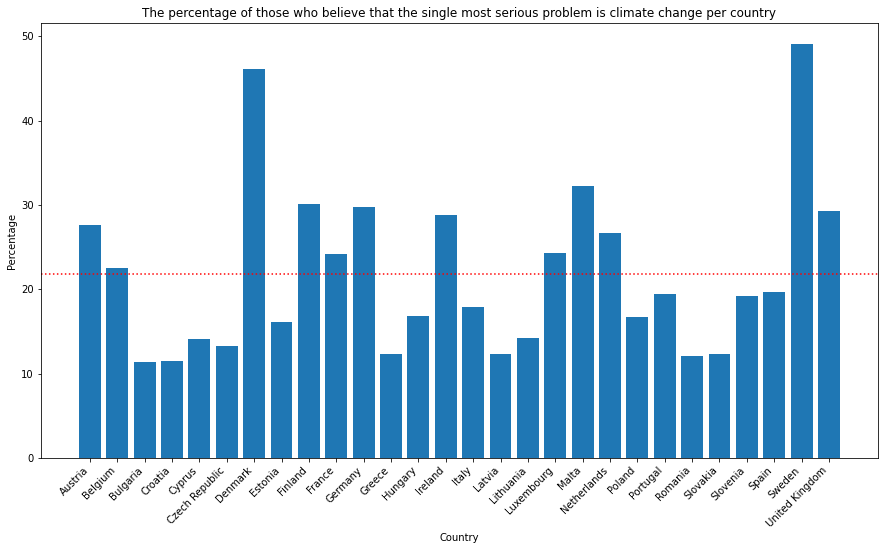

In [107]:
plt.figure(figsize=(15,8))

country = result.country
unit = result.percent
 
# Plot the bar graph
plot = plt.bar(country, unit)


# Add labels and title
plt.title("The percentage of those who believe that the single most serious problem is climate change per country")
plt.xlabel("Country")
plt.ylabel("Percentage")
plt.xticks(rotation=45, ha='right')

#####horizontal line
plt.axhline(y=result.percent.mean(), color='r', linestyle='dotted')


plt.savefig('The percentage of those who believe that the single most serious problem is climate change per country.png', bbox_inches='tight')


# Display the graph on the screen
plt.show()

#### MACRO VARIABLES: 
1. EPI 

In [2]:
EPI =pd.read_csv('epi2020results20200604.csv') 
eu = ['Austria','Italy', 'Belgium','Latvia', 'Bulgaria','Lithuania', 'Croatia','Luxembourg', 'Cyprus','Malta', 'Czech Republic', 'Netherlands','Denmark',
      'Poland', 'Estonia', 'Portugal', 'Finland', 'Romania', 'France', 'Slovakia', 'Germany', 'Slovenia', 'Greece', 'Spain', 'Hungary','Sweden', 'Ireland', 'United Kingdom']

eu.sort()
print(eu)

['Austria', 'Belgium', 'Bulgaria', 'Croatia', 'Cyprus', 'Czech Republic', 'Denmark', 'Estonia', 'Finland', 'France', 'Germany', 'Greece', 'Hungary', 'Ireland', 'Italy', 'Latvia', 'Lithuania', 'Luxembourg', 'Malta', 'Netherlands', 'Poland', 'Portugal', 'Romania', 'Slovakia', 'Slovenia', 'Spain', 'Sweden', 'United Kingdom']


In [110]:
EPI = EPI[EPI.country.isin(eu)]

EPI = EPI[['country', 'EPI.new', 'HLT.new', 'ECO.new']]
EPI = EPI.reset_index()
EPI = EPI.drop('index', axis = 1)


EPI.head()

,country,EPI.new,HLT.new,ECO.new
0,Austria,79.6,88.0,74.0
1,Belgium,73.3,86.0,64.8
2,Bulgaria,57.0,50.3,61.5
3,Cyprus,64.8,81.5,53.7
4,Czech Republic,71.0,68.3,72.9


In [111]:
geolocator = Nominatim()

EPI['lat'] = np.nan
EPI['long'] = np.nan
for i in range(len(EPI)):
        # Geolocate the center of the country
    loc = geolocator.geocode(EPI.country[i])
        # And return latitude and longitude
    EPI['lat'][i] = float(loc.latitude)
    EPI['long'][i] = float(loc.longitude)


C:\Users\giusp\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: Using Nominatim with the default "geopy/1.20.0" `user_agent` is strongly discouraged, as it violates Nominatim's ToS https://operations.osmfoundation.org/policies/nominatim/ and may possibly cause 403 and 429 HTTP errors. Please specify a custom `user_agent` with `Nominatim(user_agent="my-application")` or by overriding the default `user_agent`: `geopy.geocoders.options.default_user_agent = "my-application"`. In geopy 2.0 this will become an exception.
  
C:\Users\giusp\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
C:\Users\giusp\AppData\Local\Continuum\anaconda3\l

In [113]:
EPI['country'][4] =  'Czech Rep.'

C:\Users\giusp\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [117]:
lats = EPI["lat"].values
lngs = EPI["long"].values

communities_map = folium.Map(location=[np.mean(lats), np.mean(lngs)], 
               tiles = 'cartodbpositron', zoom_start = 5) #oppure metti 'Stamen Toner' su tiles


communities_map.choropleth(geo_data = communities_geo, 
            data = EPI,
            columns = ['country', 'EPI.new'],
            name='choropleth',
              key_on = 'feature.properties.name',
              fill_color = 'YlGn', 
              fill_opacity = 0.7, 
              line_opacity = 0.2,
              legend_name = 'Environmental Performance Index (EPI)-2020',
               highlight = True)


# Add a control button
#folium.map.LayerControl('topleft', collapsed= False).add_to(m)
communities_map.save('EPI.html') 

C:\Users\giusp\AppData\Local\Continuum\anaconda3\lib\site-packages\folium\folium.py:415: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  FutureWarning


2. CCPI

In [21]:
CP =pd.read_csv('Climate Policy 2019.csv', sep = ',', header = None) 
CP = CP.rename({0: 'rank', 1: 'country', 2: 'climate_policy', 3: 'overall rating', 4: 'national cp'}, axis='columns')

CP['country'][31] = 'Slovakia'
CP = CP[CP.country.isin(eu)].reset_index()


len(CP)

C:\Users\giusp\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


28

In [22]:
geolocator = Nominatim()

CP['lat'] = np.nan
CP['long'] = np.nan
for i in range(len(CP)):
        # Geolocate the center of the country
    loc = geolocator.geocode(CP.country[i])
        # And return latitude and longitude
    CP['lat'][i] = float(loc.latitude)
    CP['long'][i] = float(loc.longitude)

C:\Users\giusp\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Using Nominatim with the default "geopy/1.20.0" `user_agent` is strongly discouraged, as it violates Nominatim's ToS https://operations.osmfoundation.org/policies/nominatim/ and may possibly cause 403 and 429 HTTP errors. Please specify a custom `user_agent` with `Nominatim(user_agent="my-application")` or by overriding the default `user_agent`: `geopy.geocoders.options.default_user_agent = "my-application"`. In geopy 2.0 this will become an exception.
  """Entry point for launching an IPython kernel.
C:\Users\giusp\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
C:\Users\giusp\AppData\Local\

In [23]:
CP['country'][15] =  'Czech Rep.'

C:\Users\giusp\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [25]:
# Get Lat and Long
lats = CP["lat"].values
lngs = CP["long"].values

communities_map = folium.Map(location=[np.mean(lats), np.mean(lngs)], 
               tiles = 'cartodbpositron', zoom_start = 5) #oppure metti 'Stamen Toner' su tiles


communities_map.choropleth(geo_data = communities_geo, 
            data = CP,
            columns = ['country', 'climate_policy'],
            name='choropleth',
              key_on = 'feature.properties.name',
              fill_color = 'YlGnBu', 
              fill_opacity = 0.7, 
              line_opacity = 0.2,
              legend_name = 'Climate Change Policy-2019',
               highlight = True)
#display(communities_map)

# Add a control button
#folium.map.LayerControl('topleft', collapsed= False).add_to(m)
communities_map.save('CP.html') 